In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import plotly.express as px
from ipywidgets import interact, widgets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv("/content/Health_Insurance_Premium_Charges_Prediction_11 (1).csv")

In [6]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


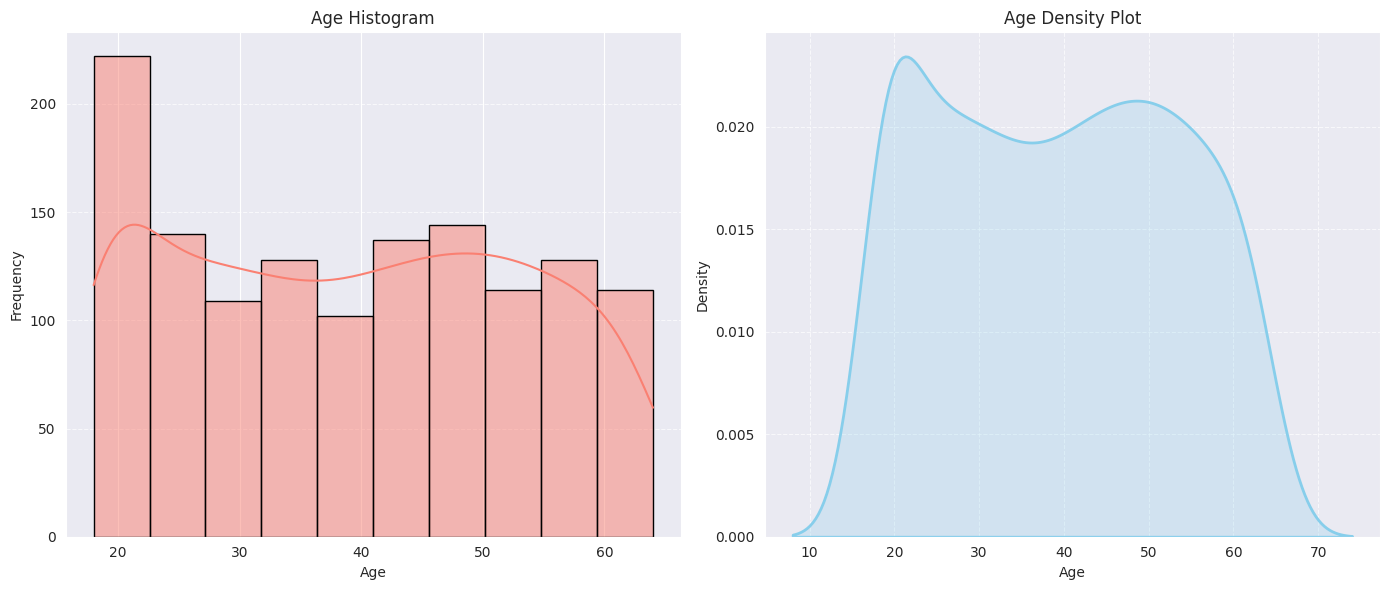

In [11]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Histogram
sns.histplot(data=df, x='age', bins=10, kde=True, color='salmon', edgecolor='black', ax=axs[0])
axs[0].set_title('Age Histogram')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
# KDE Plot
sns.kdeplot(data=df, x='age', fill=True, color='skyblue', linewidth=2, ax=axs[1])
axs[1].set_title('Age Density Plot')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Density')
axs[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/tmp/ipython-input-721991361.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age_Category', palette=age_category_colors, ax=axs[0])


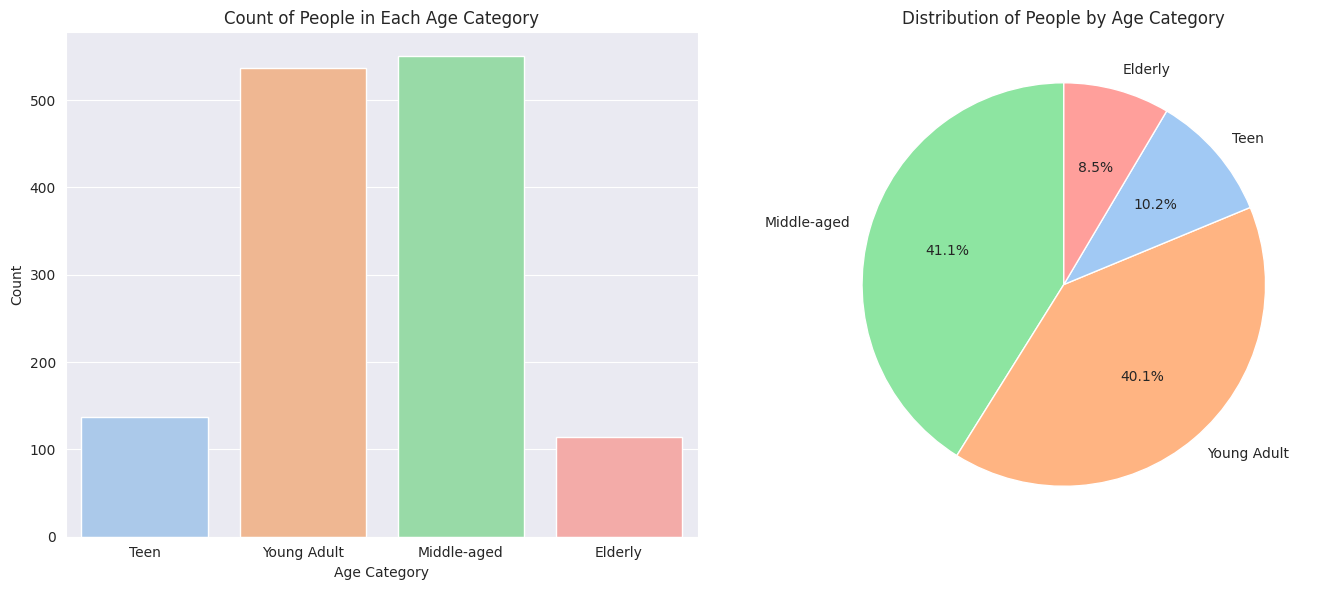

In [12]:
"""As we can see, the age column has a maximum number of rows for the age group between 20-30.
However, just by looking at the above plot, we can not get a clear understanding for the distribution of the data. So, I decided to divide the age into four different parts, namely given as '**Teen**', '**Young-adult**', '**Middle-aged**' and '**Elderly**'
"""
def categorize_age(age):
    if age < 20:
        return 'Teen'
    elif 20 <= age < 40:
        return 'Young Adult'
    elif 40 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Elderly'

df['Age_Category'] = df['age'].apply(categorize_age)

sns.set_style("darkgrid")

age_category_colors = {
    'Teen': sns.color_palette("pastel")[0],
    'Young Adult': sns.color_palette("pastel")[1],
    'Middle-aged': sns.color_palette("pastel")[2],
    'Elderly': sns.color_palette("pastel")[3]
}

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Count plot
sns.countplot(data=df, x='Age_Category', palette=age_category_colors, ax=axs[0])
axs[0].set_title('Count of People in Each Age Category')
axs[0].set_xlabel('Age Category')
axs[0].set_ylabel('Count')

# Pie chart
age_category_counts = df['Age_Category'].value_counts()
axs[1].pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%', colors=[age_category_colors[age] for age in age_category_counts.index], startangle=90)
axs[1].set_title('Distribution of People by Age Category')

plt.tight_layout()
plt.show()


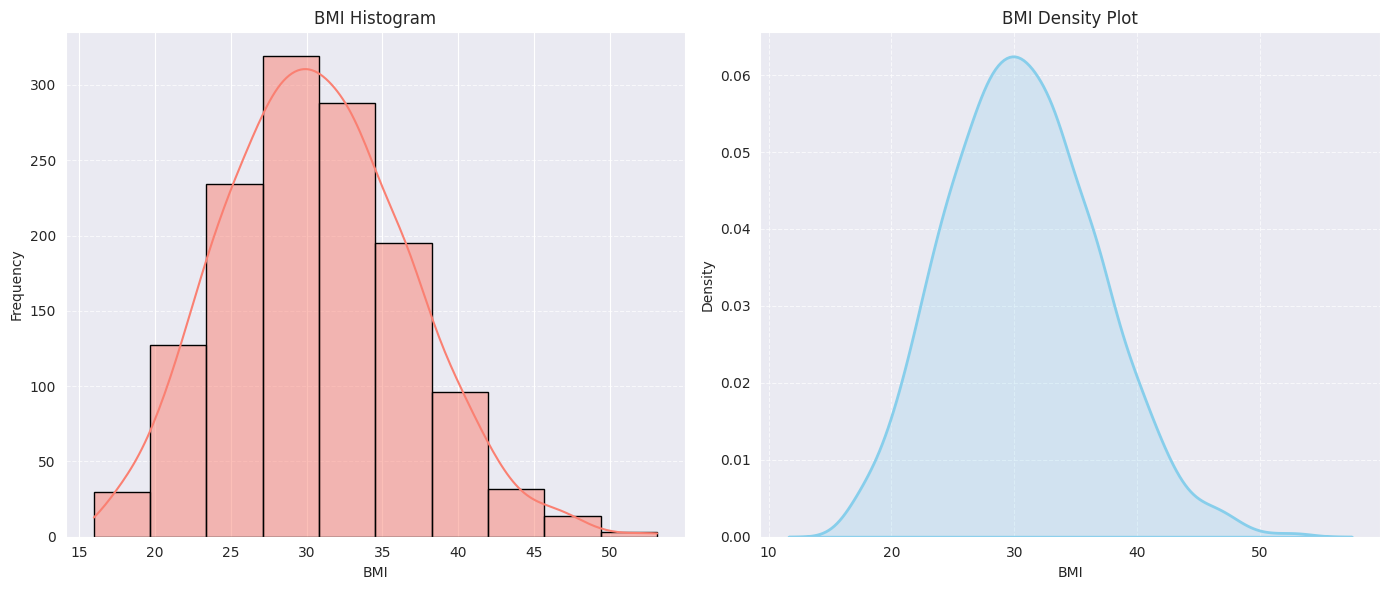

In [13]:
## **BMI**
sns.set_style("darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(data=df, x='bmi', bins=10, kde=True, color='salmon', edgecolor='black', ax=axs[0])
axs[0].set_title('BMI Histogram')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# KDE Plot
sns.kdeplot(data=df, x='bmi', fill=True, color='skyblue', linewidth=2, ax=axs[1])
axs[1].set_title('BMI Density Plot')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Density')
axs[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1612656497.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='BMI_Category', palette=palette, ax=axs[0], order=['Underweight', 'Healthy', 'Overweight', 'Obese-Class-1', 'Obese-Class-2', 'Obese-Class-3'])


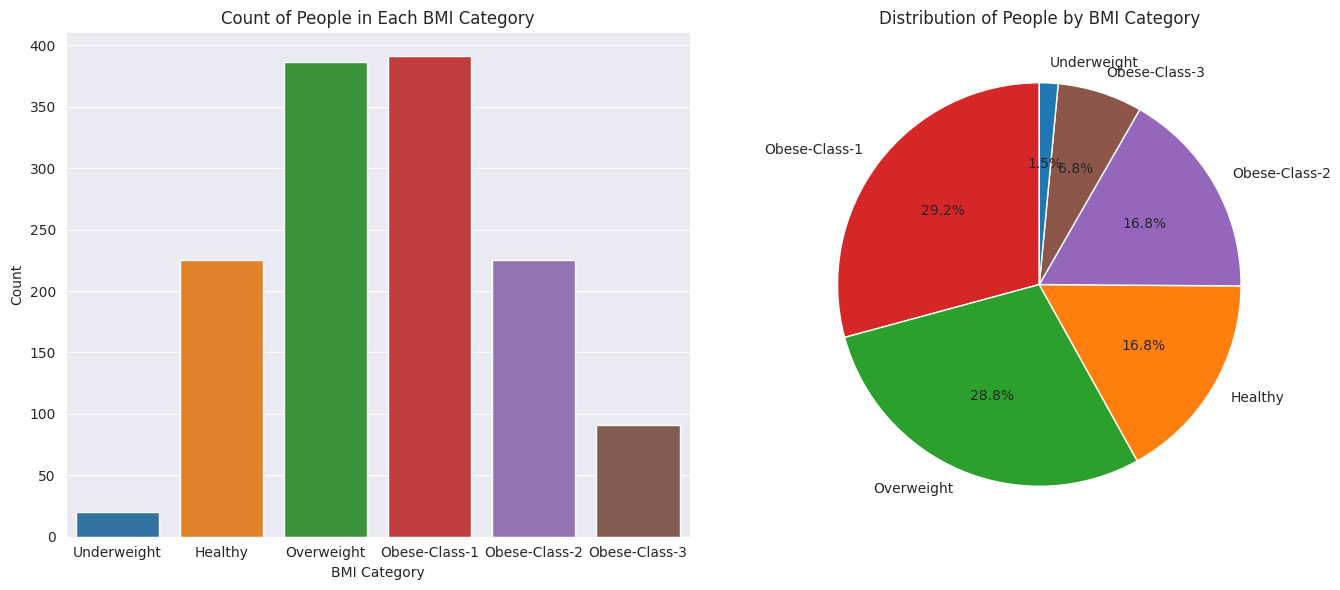

In [14]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese-Class-1'
    elif 35 <= bmi < 40:
        return 'Obese-Class-2'
    else:
        return 'Obese-Class-3'

df['BMI_Category'] = df['bmi'].apply(categorize_bmi)


bmi_category_counts = df['BMI_Category'].value_counts()

palette = {
    'Underweight': '#1f77b4',
    'Healthy': '#ff7f0e',
    'Overweight': '#2ca02c',
    'Obese-Class-1': '#d62728',
    'Obese-Class-2': '#9467bd',
    'Obese-Class-3': '#8c564b'
}

sns.set_style("darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Count plot for BMI Category
sns.countplot(data=df, x='BMI_Category', palette=palette, ax=axs[0], order=['Underweight', 'Healthy', 'Overweight', 'Obese-Class-1', 'Obese-Class-2', 'Obese-Class-3'])
axs[0].set_title('Count of People in Each BMI Category')
axs[0].set_xlabel('BMI Category')
axs[0].set_ylabel('Count')

# Pie chart for BMI Category
axs[1].pie(bmi_category_counts, labels=bmi_category_counts.index, autopct='%1.1f%%', colors=[palette[cat] for cat in bmi_category_counts.index], startangle=90)
axs[1].set_title('Distribution of People by BMI Category')

plt.tight_layout()
plt.show()

Number of different values in the 'children' column: 6


/tmp/ipython-input-2495943459.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='children', palette=palette)


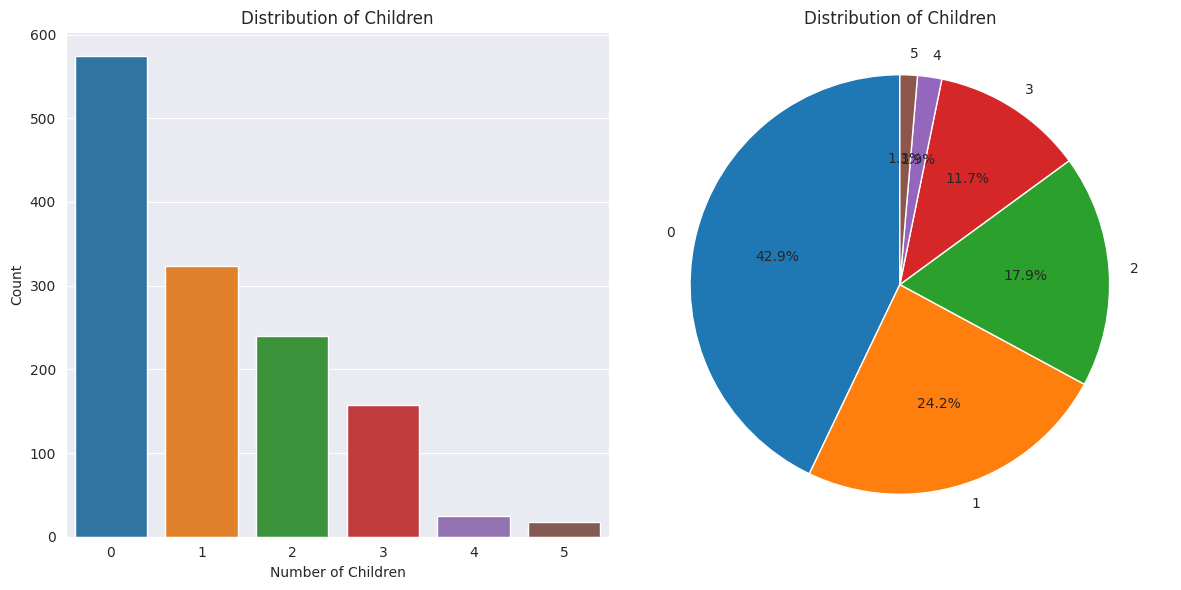

In [15]:
num_children_values = df['children'].nunique()

print("Number of different values in the 'children' column:", num_children_values)

palette = {
    '0': '#1f77b4',
    '1': '#ff7f0e',
    '2': '#2ca02c',
    '3': '#d62728',
    '4': '#9467bd',
    '5': '#8c564b'
}

# Count plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='children', palette=palette)
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
children_counts = df['children'].value_counts()
plt.pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', colors=[palette[str(i)] for i in children_counts.index], startangle=90)
plt.title('Distribution of Children')
plt.axis('equal')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2786287707.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette=colors, ax=axs[0])


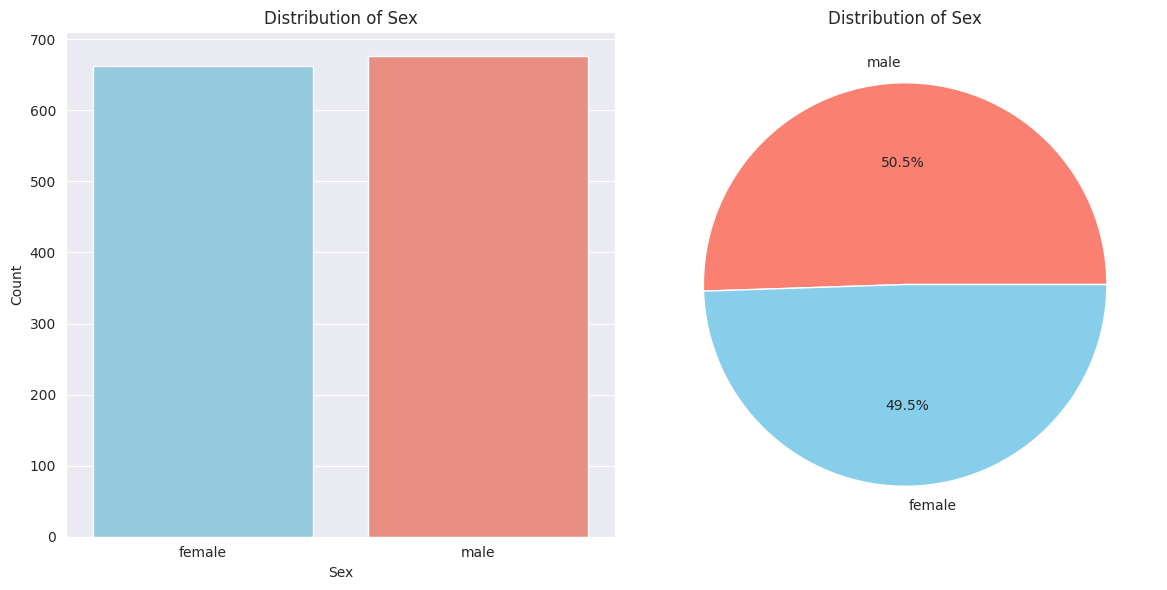

In [16]:
sns.set_style("darkgrid")

colors = {'male': 'salmon', 'female': 'skyblue'}

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.countplot(data=df, x='sex', palette=colors, ax=axs[0])
axs[0].set_title('Distribution of Sex')
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Count')

# Pie chart
sex_counts = df['sex'].value_counts()
axs[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=[colors[sex] for sex in sex_counts.index])
axs[1].set_title('Distribution of Sex')

plt.tight_layout()
plt.show()


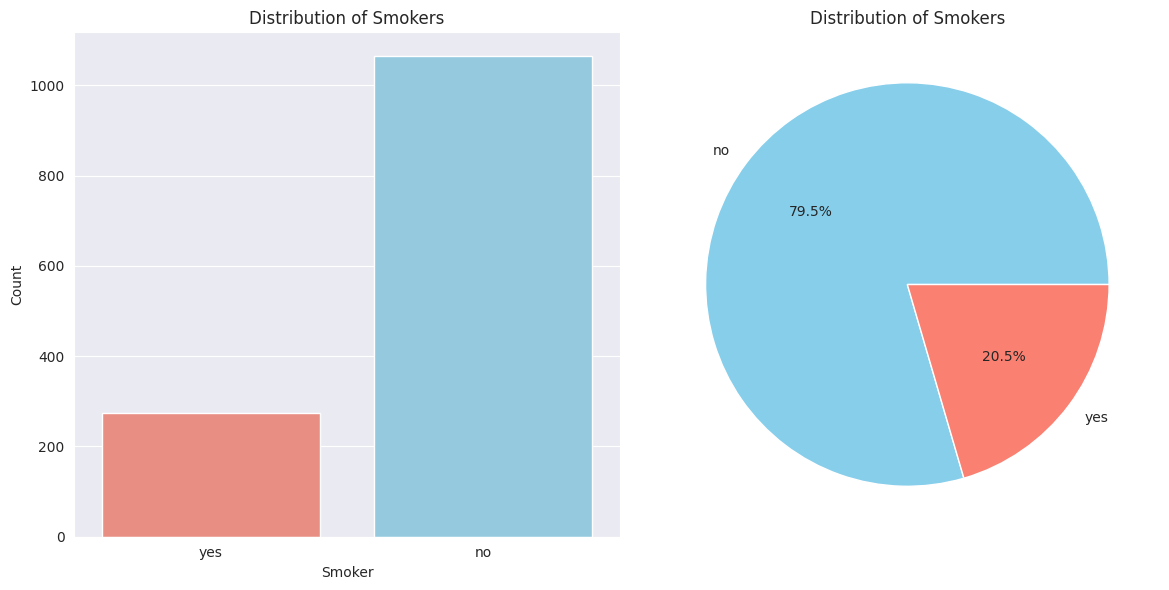

In [17]:
sns.set_style("darkgrid")

colors = {'yes': 'salmon', 'no': 'skyblue'}

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.countplot(data=df, x='smoker', hue='smoker', palette=colors.values(), legend=False, ax=axs[0])
axs[0].set_title('Distribution of Smokers')
axs[0].set_xlabel('Smoker')
axs[0].set_ylabel('Count')

smoker_counts = df['smoker'].value_counts()
axs[1].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=[colors[x] for x in smoker_counts.index])
axs[1].set_title('Distribution of Smokers')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2061853707.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='region', ax=axs[0], palette=palette)


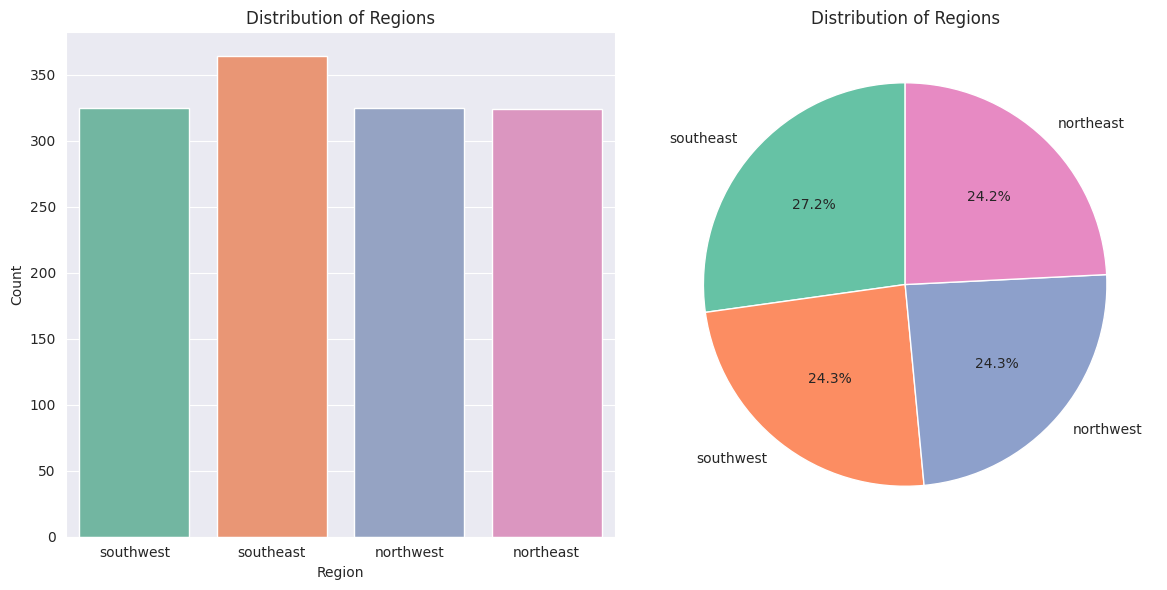

In [18]:
palette = sns.color_palette('Set2', 4)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.countplot(data=df, x='region', ax=axs[0], palette=palette)
axs[0].set_title('Distribution of Regions')
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Count')

# Pie chart
region_counts = df['region'].value_counts()
axs[1].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
axs[1].set_title('Distribution of Regions')

plt.tight_layout()
plt.show()

In [19]:
def plot_age_distribution():
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))

    # Histogram and Density Plot
    sns.histplot(data=df, x='age', bins=10, kde=True, color='salmon', edgecolor='black', ax=axs[0, 0])
    axs[0, 0].set_title('Age Histogram')
    axs[0, 0].set_xlabel('Age')
    axs[0, 0].set_ylabel('Frequency')
    sns.kdeplot(data=df, x='age', fill=True, color='skyblue', linewidth=2, ax=axs[0, 1])
    axs[0, 1].set_title('Age Density Plot')
    axs[0, 1].set_xlabel('Age')
    axs[0, 1].set_ylabel('Density')

    # Count plot for Age Category
    age_category_counts = df['Age_Category'].value_counts()
    axs[1, 0].pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
    axs[1, 0].set_title('Distribution of People by Age Category')

    sns.countplot(data=df, x='Age_Category', palette=age_category_colors, ax=axs[1, 1])
    axs[1, 1].set_title('Count of People in Each Age Category')
    axs[1, 1].set_xlabel('Age Category')
    axs[1, 1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

In [20]:
def plot_bmi_distribution():
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))

    # Histogram and Density Plot
    sns.histplot(data=df, x='bmi', bins=10, kde=True, color='salmon', edgecolor='black', ax=axs[0, 0])
    axs[0, 0].set_title('BMI Histogram')
    axs[0, 0].set_xlabel('BMI')
    axs[0, 0].set_ylabel('Frequency')
    sns.kdeplot(data=df, x='bmi', fill=True, color='skyblue', linewidth=2, ax=axs[0, 1])
    axs[0, 1].set_title('BMI Density Plot')
    axs[0, 1].set_xlabel('BMI')
    axs[0, 1].set_ylabel('Density')

    # Pie chart for BMI Category
    bmi_category_counts = df['BMI_Category'].value_counts()
    axs[1, 0].pie(bmi_category_counts, labels=bmi_category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'), startangle=90)
    axs[1, 0].set_title('Distribution of People by BMI Category')

    sns.countplot(data=df, x='BMI_Category', palette=palette, ax=axs[1, 1], order=['Underweight', 'Healthy', 'Overweight', 'Obese-Class-1', 'Obese-Class-2', 'Obese-Class-3'])
    axs[1, 1].set_title('Count of People in Each BMI Category')
    axs[1, 1].set_xlabel('BMI Category')
    axs[1, 1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

In [21]:
def plot_children_distribution():
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Bar chart for 'children' column
    sns.countplot(data=df, x='children', palette='pastel', ax=axs[0])
    axs[0].set_title('Distribution of Children')
    axs[0].set_xlabel('Number of Children')
    axs[0].set_ylabel('Count')

    # Pie chart for 'children' column
    children_counts = df['children'].value_counts()
    axs[1].pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
    axs[1].set_title('Distribution of Children')

    plt.tight_layout()
    plt.show()

In [22]:
def plot_sex_distribution():
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Count plot for 'sex' column
    sns.countplot(data=df, x='sex', palette='pastel', ax=axs[0])
    axs[0].set_title('Distribution of Sex')
    axs[0].set_xlabel('Sex')
    axs[0].set_ylabel('Count')

    # Pie chart for 'sex' column
    sex_counts = df['sex'].value_counts()
    axs[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
    axs[1].set_title('Distribution of Sex')

    plt.tight_layout()
    plt.show()

In [23]:
def plot_smoker_distribution():
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Count plot for 'smoker' column
    sns.countplot(data=df, x='smoker', palette='pastel', ax=axs[0])
    axs[0].set_title('Distribution of Smokers')
    axs[0].set_xlabel('Smoker')
    axs[0].set_ylabel('Count')

    # Pie chart for 'smoker' column
    smoker_counts = df['smoker'].value_counts()
    axs[1].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
    axs[1].set_title('Distribution of Smokers')

    plt.tight_layout()
    plt.show()

In [24]:
def plot_region_distribution():
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Count plot for 'region' column
    sns.countplot(data=df, x='region', palette='pastel', ax=axs[0])
    axs[0].set_title('Distribution of Regions')
    axs[0].set_xlabel('Region')
    axs[0].set_ylabel('Count')

    # Pie chart for 'region' column
    region_counts = df['region'].value_counts()
    axs[1].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
    axs[1].set_title('Distribution of Regions')

    plt.tight_layout()
    plt.show()

In [25]:
# Create interactive widget
@interact(column=widgets.Dropdown(options=['age', 'bmi', 'children', 'sex', 'smoker', 'region'], description='Select Column:', style={'description_width': 'initial'}))
def plot_distribution(column):
    if column == 'age':
        plot_age_distribution()
    elif column == 'bmi':
        plot_bmi_distribution()
    elif column == 'children':
        plot_children_distribution()
    elif column == 'sex':
        plot_sex_distribution()
    elif column == 'smoker':
        plot_smoker_distribution()
    elif column == 'region':
        plot_region_distribution()

interactive(children=(Dropdown(description='Select Column:', options=('age', 'bmi', 'children', 'sex', 'smoker…

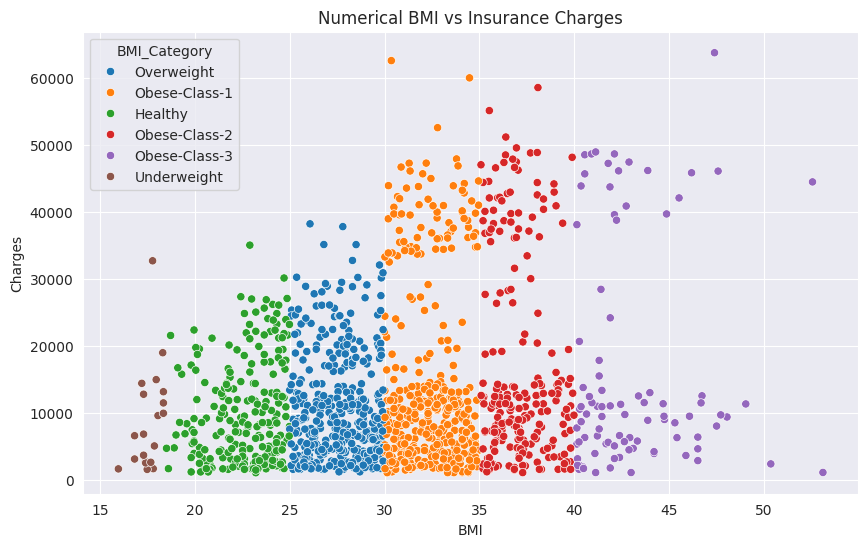

In [26]:
# Scatter plot for Numerical BMI vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue = 'BMI_Category', color='skyblue')
plt.title('Numerical BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

/tmp/ipython-input-4135379578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BMI_Category', y='charges', palette='Set1', order=bmi_category_order)


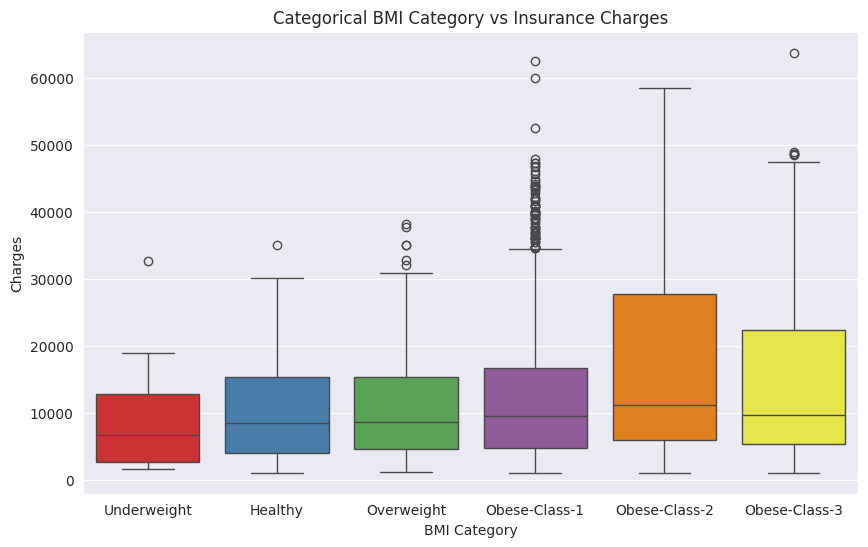

In [28]:
# Box plot for Categorical BMI_Category vs Charges
bmi_category_order = ['Underweight', 'Healthy', 'Overweight', 'Obese-Class-1', 'Obese-Class-2', 'Obese-Class-3']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BMI_Category', y='charges', palette='Set1', order=bmi_category_order)
plt.title('Categorical BMI Category vs Insurance Charges')
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.show()

/tmp/ipython-input-828982080.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='BMI_Category', y='charges', estimator='mean', ci=None, markers=True)


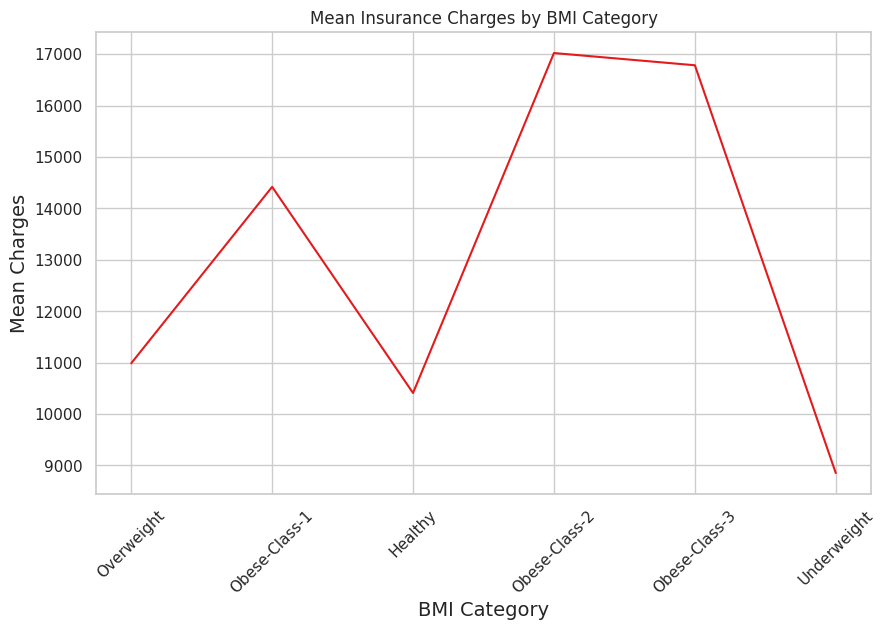

In [29]:
sns.set(style="whitegrid", palette="Set1", rc={'axes.labelsize': 14})

# Define the order of categories
bmi_category_order = ['Underweight', 'Healthy', 'Overweight', 'Obese-Class-1', 'Obese-Class-2', 'Obese-Class-3']

# Group data by BMI category and calculate the mean charges
bmi_charges_mean = df.groupby('BMI_Category')['charges'].mean().reindex(bmi_category_order)

# Line plot for Categorical BMI_Category vs Mean Charges
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='BMI_Category', y='charges', estimator='mean', ci=None, markers=True)
plt.title('Mean Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Mean Charges')
plt.xticks(rotation=45)
plt.show()

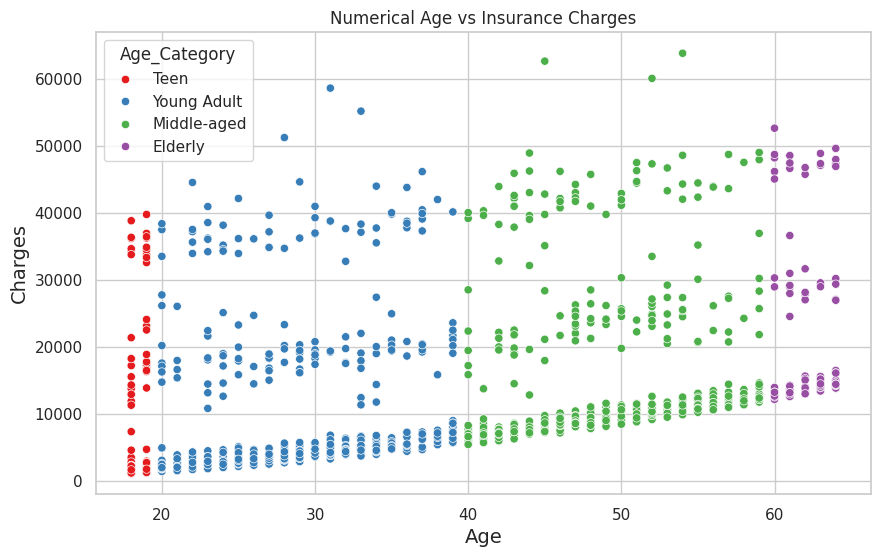

In [30]:
# Scatter plot for Numerical Age vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges',hue = 'Age_Category', color='skyblue')
plt.title('Numerical Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

/tmp/ipython-input-23214169.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Category', y='charges', palette='Set2', order=age_category_order)


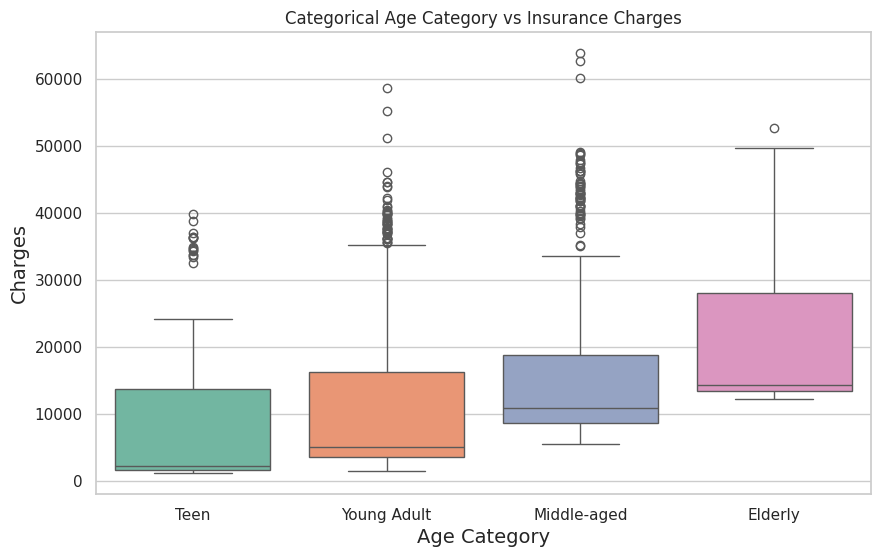

In [31]:
# Define the order of age categories
age_category_order = ['Teen', 'Young Adult', 'Middle-aged', 'Elderly']

# Box plot for Categorical Age_Category vs Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Category', y='charges', palette='Set2', order=age_category_order)
plt.title('Categorical Age Category vs Insurance Charges')
plt.xlabel('Age Category')
plt.ylabel('Charges')
plt.show()

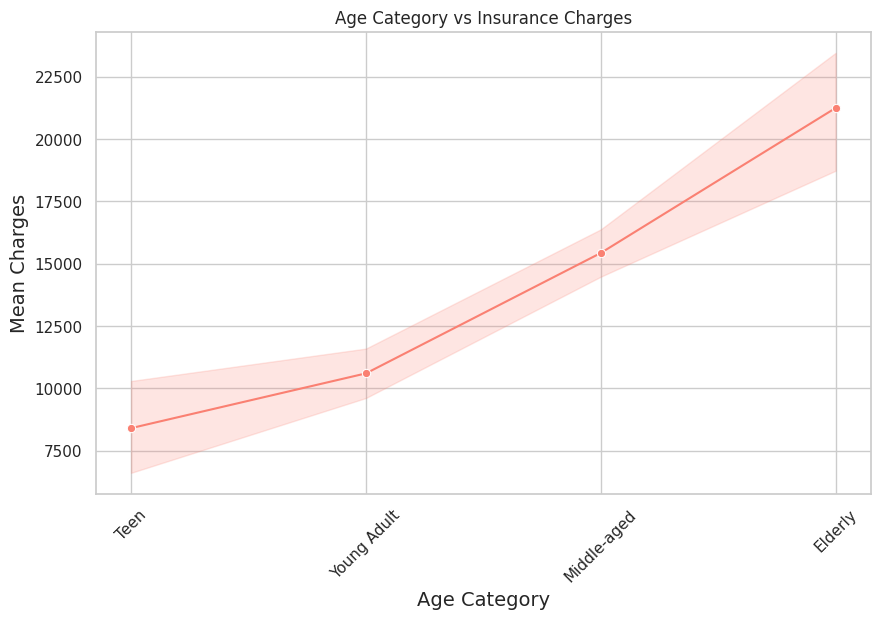

In [32]:
# Line plot for Age_Category vs Charges
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age_Category', y='charges', marker='o', color='salmon', sort=False)
plt.title('Age Category vs Insurance Charges')
plt.xlabel('Age Category')
plt.ylabel('Mean Charges')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

/tmp/ipython-input-2217489303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='charges', palette='Set3')


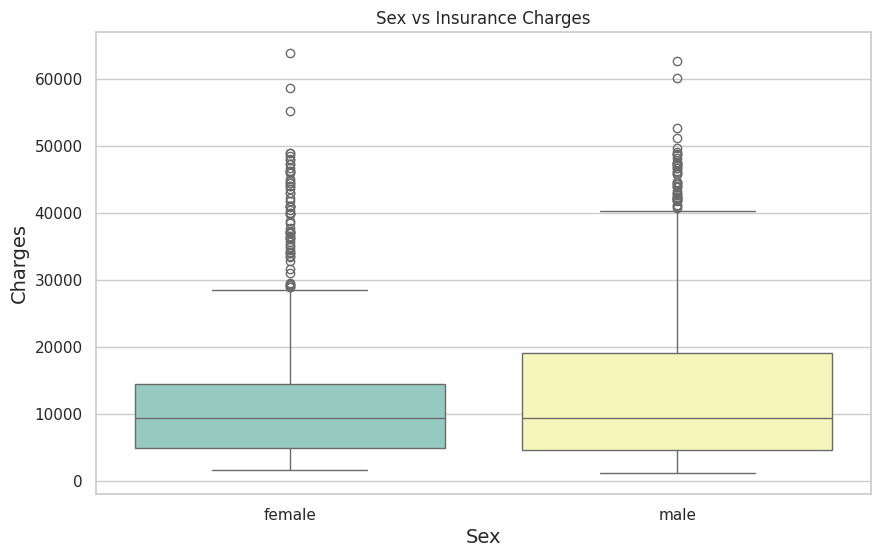

In [33]:
# Box plot for Sex vs Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='charges', palette='Set3')
plt.title('Sex vs Insurance Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

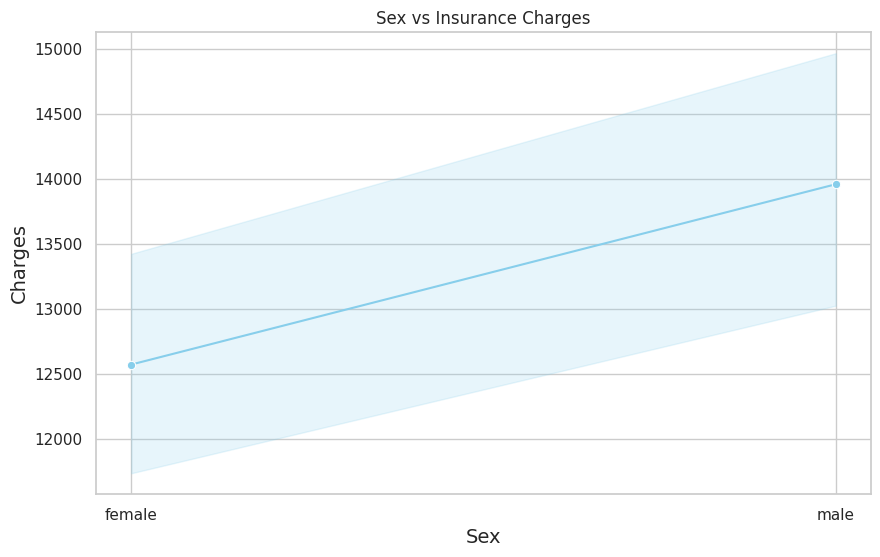

In [34]:
# Line plot for Sex vs Charges
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='sex', y='charges', marker='o', color='skyblue')
plt.title('Sex vs Insurance Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

/tmp/ipython-input-2403881673.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='children', y='charges', estimator='mean', ci=None, markers=True, ax=axs[0])
/tmp/ipython-input-2403881673.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='children', y='charges', palette='Set2', ax=axs[1])


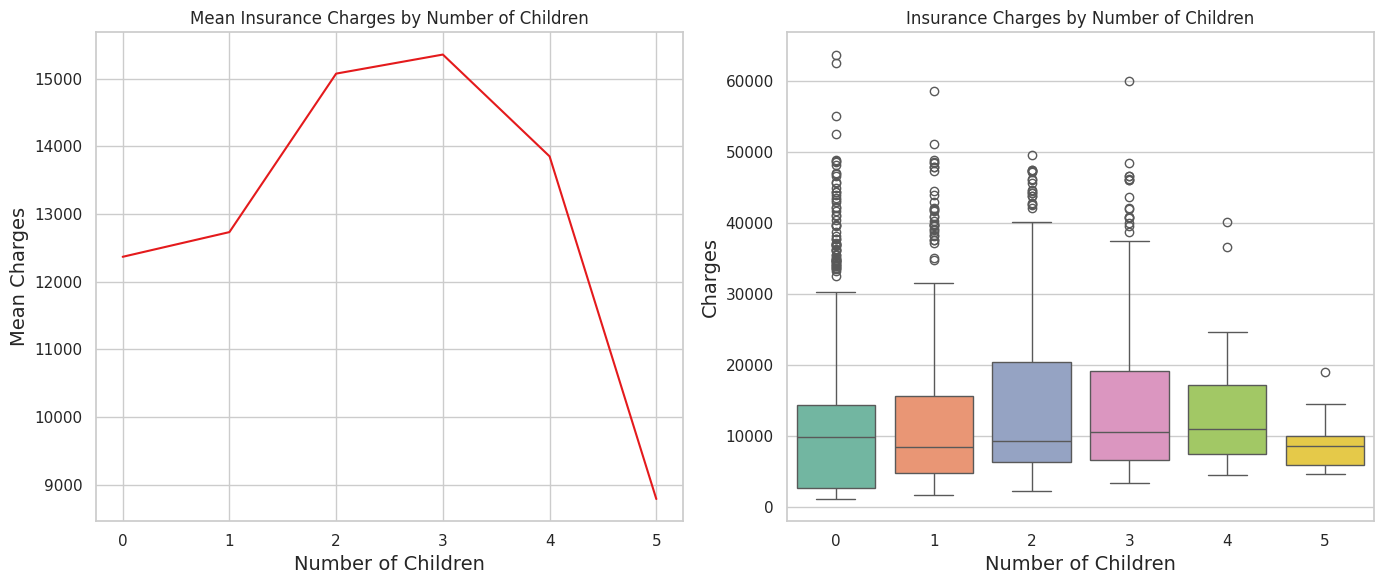

In [35]:
children_stats = df.groupby('children')['charges'].agg(['mean', 'sum'])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Line plot for Number of Children vs Mean Charges
sns.lineplot(data=df, x='children', y='charges', estimator='mean', ci=None, markers=True, ax=axs[0])
axs[0].set_title('Mean Insurance Charges by Number of Children')
axs[0].set_xlabel('Number of Children')
axs[0].set_ylabel('Mean Charges')

# Box plot for Number of Children vs Charges
sns.boxplot(data=df, x='children', y='charges', palette='Set2', ax=axs[1])
axs[1].set_title('Insurance Charges by Number of Children')
axs[1].set_xlabel('Number of Children')
axs[1].set_ylabel('Charges')


plt.tight_layout()
plt.show()

/tmp/ipython-input-1835795758.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoker', y='charges', palette='Set1', ax=axs[0])
/tmp/ipython-input-1835795758.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='smoker', y='charges', estimator='mean', ci=None, markers=True, ax=axs[1])


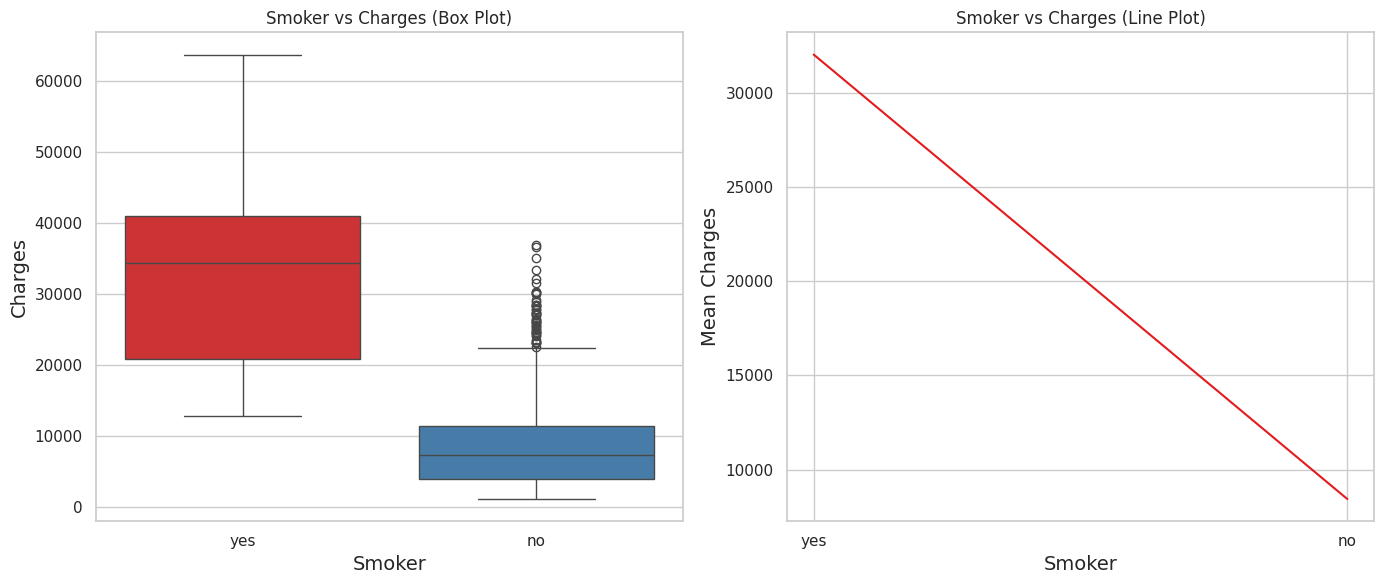

In [36]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Smoker vs Charges
sns.boxplot(data=df, x='smoker', y='charges', palette='Set1', ax=axs[0])
axs[0].set_title('Smoker vs Charges (Box Plot)')
axs[0].set_xlabel('Smoker')
axs[0].set_ylabel('Charges')

# Line plot for Smoker vs Charges
sns.lineplot(data=df, x='smoker', y='charges', estimator='mean', ci=None, markers=True, ax=axs[1])
axs[1].set_title('Smoker vs Charges (Line Plot)')
axs[1].set_xlabel('Smoker')
axs[1].set_ylabel('Mean Charges')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2927233895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='charges', palette='Set1', ax=axs[0])
/tmp/ipython-input-2927233895.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='region', y='charges', estimator='mean', ci=None, markers=True, ax=axs[1])


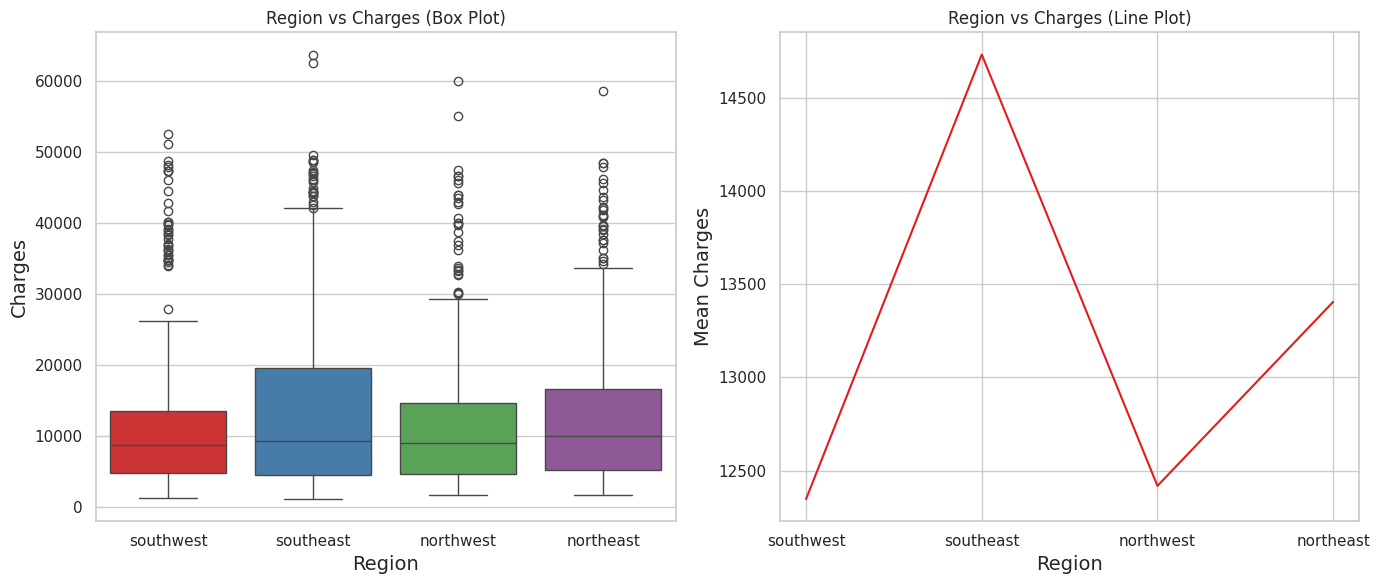

In [37]:

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Region vs Charges
sns.boxplot(data=df, x='region', y='charges', palette='Set1', ax=axs[0])
axs[0].set_title('Region vs Charges (Box Plot)')
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Charges')

# Line plot for Region vs Charges
sns.lineplot(data=df, x='region', y='charges', estimator='mean', ci=None, markers=True, ax=axs[1])
axs[1].set_title('Region vs Charges (Line Plot)')
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Mean Charges')

plt.tight_layout()
plt.show()

In [38]:
X = df.drop(columns=['charges'])
y = df['charges']

In [39]:
categorical_cols = ['sex', 'smoker', 'region']
numeric_cols = ['age', 'bmi', 'children']

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [41]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [42]:
performance_metrics = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    performance_metrics[name] = {'Mean Squared Error': mse,
                                  'R^2 Score': r2,
                                  'Mean Absolute Error': mae,
                                  'Explained Variance Score': evs}

for name, metrics in performance_metrics.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")


Linear Regression:
  Mean Squared Error: 33596915.851361476
  R^2 Score: 0.7835929767120722
  Mean Absolute Error: 4181.194473753649
  Explained Variance Score: 0.7839025861417648

Ridge Regression:
  Mean Squared Error: 33619947.00761633
  R^2 Score: 0.7834446266673822
  Mean Absolute Error: 4187.3027829809
  Explained Variance Score: 0.783755088313839

Decision Tree:
  Mean Squared Error: 39445985.47483982
  R^2 Score: 0.7459175022184962
  Mean Absolute Error: 2965.8159301343285
  Explained Variance Score: 0.7491514956384727

Random Forest:
  Mean Squared Error: 21374596.88725291
  R^2 Score: 0.8623203121734652
  Mean Absolute Error: 2525.967599240237
  Explained Variance Score: 0.8635951892427852


In [43]:
X = df.drop(columns=['charges'])
y = df['charges']

# Preprocessing: One-hot encode categorical variables and apply PCA
categorical_cols = ['sex', 'smoker', 'region']
numeric_cols = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Evaluate models with PCA
performance_metrics_pca = {}
for n_components in range(1, len(X.columns) + 1):
    pca = PCA(n_components=n_components)

    for name, model in models.items():
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('pca', pca),
                                   ('model', model)])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        evs = explained_variance_score(y_test, y_pred)

        if n_components not in performance_metrics_pca:
            performance_metrics_pca[n_components] = {}

        performance_metrics_pca[n_components][name] = {'Mean Squared Error': mse,
                                                      'R^2 Score': r2,
                                                      'Mean Absolute Error': mae,
                                                      'Explained Variance Score': evs}

In [44]:
# Find the best number of principal components based on R^2 score
best_n_components = max(performance_metrics_pca.keys(), key=lambda x: performance_metrics_pca[x]['Random Forest']['R^2 Score'])

print(f"Best number of principal components: {best_n_components}")

# Print performance metrics for the best number of principal components
print("\nPerformance Metrics with PCA:")
for name, metrics in performance_metrics_pca[best_n_components].items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

Best number of principal components: 6

Performance Metrics with PCA:

Linear Regression:
  Mean Squared Error: 37189517.470373586
  R^2 Score: 0.7604520364641805
  Mean Absolute Error: 4458.616087510428
  Explained Variance Score: 0.7607608872344795

Ridge Regression:
  Mean Squared Error: 37199836.50399672
  R^2 Score: 0.7603855687157874
  Mean Absolute Error: 4461.721750407279
  Explained Variance Score: 0.7606954529387102

Decision Tree:
  Mean Squared Error: 39688929.644475155
  R^2 Score: 0.7443526316569083
  Mean Absolute Error: 2949.128759847015
  Explained Variance Score: 0.7447116558314434

Random Forest:
  Mean Squared Error: 22208397.348078374
  R^2 Score: 0.8569495728906797
  Mean Absolute Error: 2754.3782621568093
  Explained Variance Score: 0.8574759818393183


In [46]:
from sklearn.tree import export_graphviz
import graphviz

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    if name == 'Decision Tree':
        categories = pipeline.named_steps['preprocessor'].named_transformers_['cat'].categories_
        feature_names = numeric_cols + [f"{col}_{value}" for col, values in zip(categorical_cols, categories) for value in values]

        dot_data = export_graphviz(model, out_file=None,
                                   feature_names=feature_names,
                                   filled=True, rounded=True)
        graph = graphviz.Source(dot_data)
        graph.render(f"{name}_tree")
        print(f"Decision Tree visualization saved as {name}_tree.pdf")

    if name in ['Linear Regression', 'Ridge Regression', 'Random Forest']:
        results_df = pd.DataFrame({y_test.name: y_test, 'Predicted': y_pred})

        # Plot using Plotly
        fig = px.scatter(results_df, x=y_test.name, y='Predicted', title=f"{name} - Actual vs Predicted Charges",
                         labels={y_test.name: 'Actual Charges', 'Predicted': 'Predicted Charges'},
                         hover_data={y_test.name: True, 'Predicted': True},
                         trendline="ols", color=y_test.name)
        fig.update_traces(marker=dict(size=10, opacity=0.5),
                          selector=dict(mode='markers'))
        fig.update_layout(hovermode='closest')
        fig.show()

Decision Tree visualization saved as Decision Tree_tree.pdf


In [48]:
from xgboost import XGBRegressor

models['XGBoost'] = XGBRegressor()

In [49]:
performance_metrics = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    performance_metrics[name] = {'Mean Squared Error': mse,
                                  'R^2 Score': r2,
                                  'Mean Absolute Error': mae,
                                  'Explained Variance Score': evs}

for name, metrics in performance_metrics.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")


Linear Regression:
  Mean Squared Error: 33596915.851361476
  R^2 Score: 0.7835929767120722
  Mean Absolute Error: 4181.194473753652
  Explained Variance Score: 0.7839025861417648

Ridge Regression:
  Mean Squared Error: 33620268.9209166
  R^2 Score: 0.7834425531348183
  Mean Absolute Error: 4186.913071783839
  Explained Variance Score: 0.7837532046854536

Decision Tree:
  Mean Squared Error: 38934310.777473405
  R^2 Score: 0.7492133404031291
  Mean Absolute Error: 2926.576395220149
  Explained Variance Score: 0.7521362830637232

Random Forest:
  Mean Squared Error: 21281057.67684046
  R^2 Score: 0.8629228240878211
  Mean Absolute Error: 2536.567456225312
  Explained Variance Score: 0.8640294539167923

XGBoost:
  Mean Squared Error: 22454421.07426046
  R^2 Score: 0.8553648660539922
  Mean Absolute Error: 2604.33380438727
  Explained Variance Score: 0.8553651614630164


In [50]:
results_df = pd.DataFrame({y_test.name: y_test, 'Predicted': y_pred})

fig = px.scatter(results_df, x=y_test.name, y='Predicted', title="XGBoost - Actual vs Predicted Charges",
                 labels={y_test.name: 'Actual Charges', 'Predicted': 'Predicted Charges'},
                 hover_data={y_test.name: True, 'Predicted': True},
                 trendline="ols", color=y_test.name)
fig.update_traces(marker=dict(size=10, opacity=0.5),
                  selector=dict(mode='markers'))
fig.update_layout(hovermode='closest')
fig.show()